In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import auto_arima
from sklearn.metrics import root_mean_squared_error

# ARIMA model

In [12]:
df = pd.read_csv("AusGas.csv", index_col = 0)
df.index = pd.to_datetime(df.index, format='mixed').to_period('M').to_timestamp() 
df

,GasProd
Month,
1956-01-01,1709
1956-02-01,1646
1956-03-01,1794
1956-04-01,1878
1956-05-01,2173
...,...
1995-04-01,49013
1995-05-01,56624
1995-06-01,61739


In [14]:
y = df["GasProd"]
y_train = y[:-12]
y_test = y[-12:]

In [34]:
# Arima

model = auto_arima(y_train, 
                  trace = True,
                  error_action = "ignore", 
                  suppress_warnings = True,
                # seasonal = True,
                #    m = 12
                 )

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8355.049, Time=1.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8632.352, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8589.946, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8603.593, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8631.502, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8571.932, Time=0.54 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8577.053, Time=0.15 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=8323.032, Time=1.35 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=8426.161, Time=1.11 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=8270.437, Time=1.48 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=8404.293, Time=1.16 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=8391.009, Time=1.87 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.71 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.50 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=8

In [26]:
y_pred = model.predict(n_periods = len(y_test))
root_mean_squared_error(y_test, y_pred)

2580.7662520472354

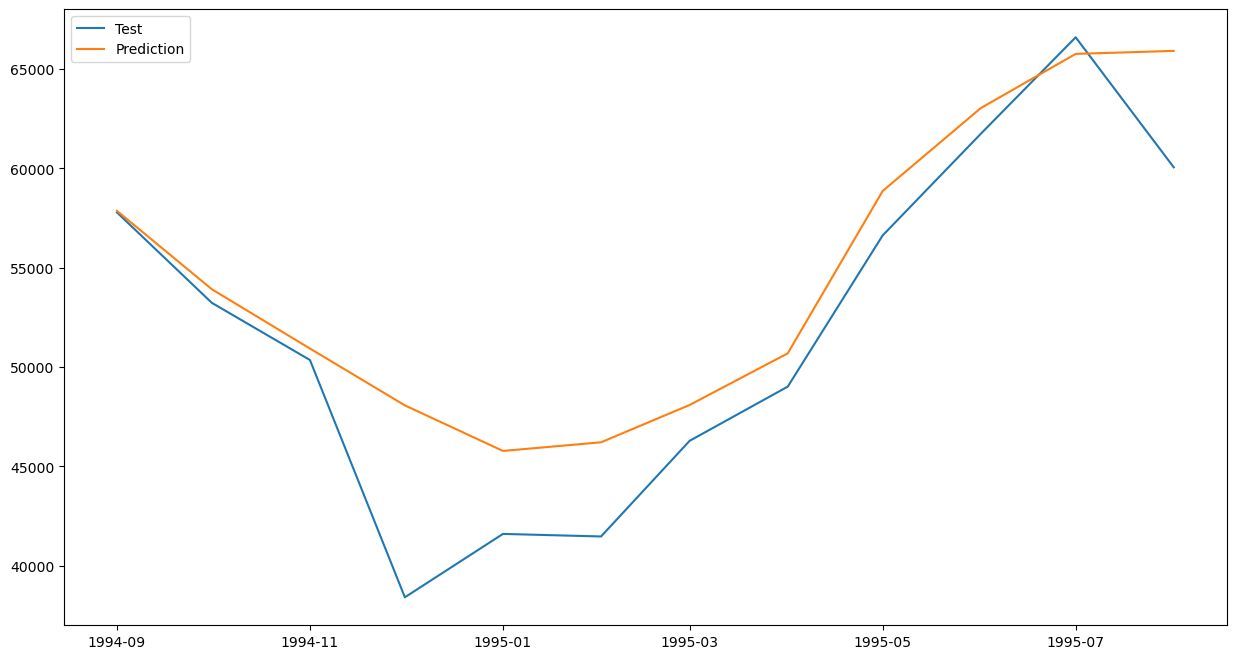

In [36]:
plt.figure(figsize = (15, 8))
plt.plot(y_test, label = "Test")
plt.plot(y_pred, label = "Prediction")
plt.legend()
plt.show()

In [38]:
# SARIMA

model = auto_arima(y_train, 
                  trace = True,
                  error_action = "ignore", 
                  suppress_warnings = True, 
                   seasonal = True,
                   m = 24
                 )

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[24] intercept   : AIC=inf, Time=5.10 sec
 ARIMA(0,1,0)(0,0,0)[24] intercept   : AIC=8632.352, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[24] intercept   : AIC=inf, Time=1.74 sec
 ARIMA(0,1,1)(0,0,1)[24] intercept   : AIC=8505.767, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[24]             : AIC=8631.502, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[24] intercept   : AIC=8603.593, Time=0.06 sec
 ARIMA(0,1,1)(1,0,1)[24] intercept   : AIC=8275.399, Time=3.41 sec
 ARIMA(0,1,1)(1,0,0)[24] intercept   : AIC=8317.651, Time=2.46 sec
 ARIMA(0,1,1)(2,0,1)[24] intercept   : AIC=8285.040, Time=13.82 sec
 ARIMA(0,1,1)(1,0,2)[24] intercept   : AIC=8276.869, Time=11.56 sec
 ARIMA(0,1,1)(0,0,2)[24] intercept   : AIC=8397.063, Time=6.85 sec
 ARIMA(0,1,1)(2,0,0)[24] intercept   : AIC=8261.854, Time=9.35 sec
 ARIMA(0,1,0)(2,0,0)[24] intercept   : AIC=inf, Time=8.17 sec
 ARIMA(1,1,1)(2,0,0)[24] intercept   : AIC=8278.195, Time=12.54 sec
 ARIMA(0,1,2)(2,0,0)[24] interc

In [40]:
y_pred = model.predict(n_periods = len(y_test))
root_mean_squared_error(y_test, y_pred)

3315.8645972111503

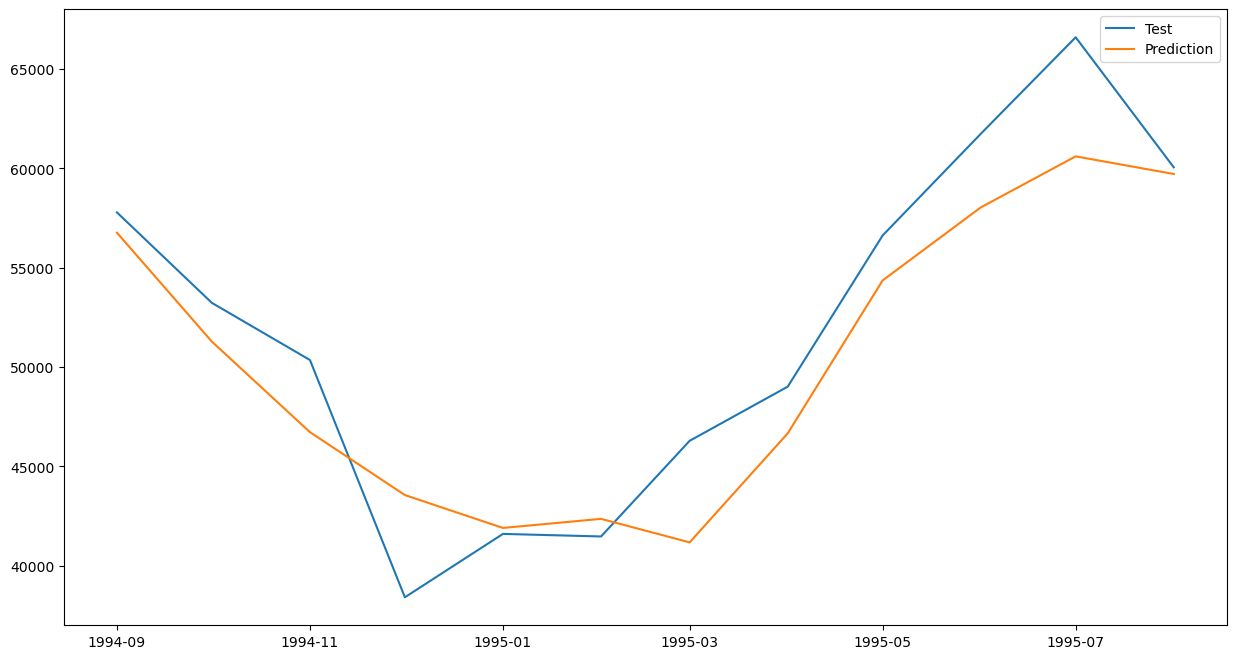

In [42]:
plt.figure(figsize = (15, 8))
plt.plot(y_test, label = "Test")
plt.plot(y_pred, label = "Prediction")
plt.legend()
plt.show()

# Shampoo Sales 

<Axes: xlabel='Month'>

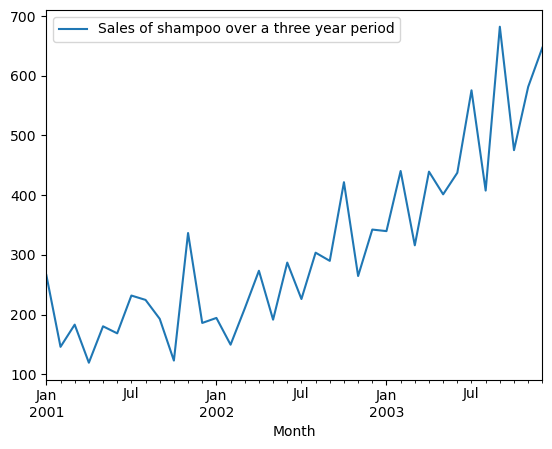

In [63]:
df = pd.read_csv("sales-of-shampoo-over-a-three-ye.csv", index_col = 0)
df.index = pd.to_datetime(df.index).to_period('M').to_timestamp()
df.plot()

In [49]:
y = df["Sales of shampoo over a three year period"]
y_train = y[:-4]
y_test = y[-4:]


In [51]:
model = auto_arima(y_train, 
                  trace = True,
                  error_action = "ignore", 
                  suppress_warnings = True,
                 )

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=373.875, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=356.931, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=355.668, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=371.947, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=353.854, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=355.848, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=357.047, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=356.746, Time=0.07 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 1.780 seconds


In [53]:
y_pred = model.predict(n_periods = len(y_test))
root_mean_squared_error(y_test, y_pred)

114.58473812122321

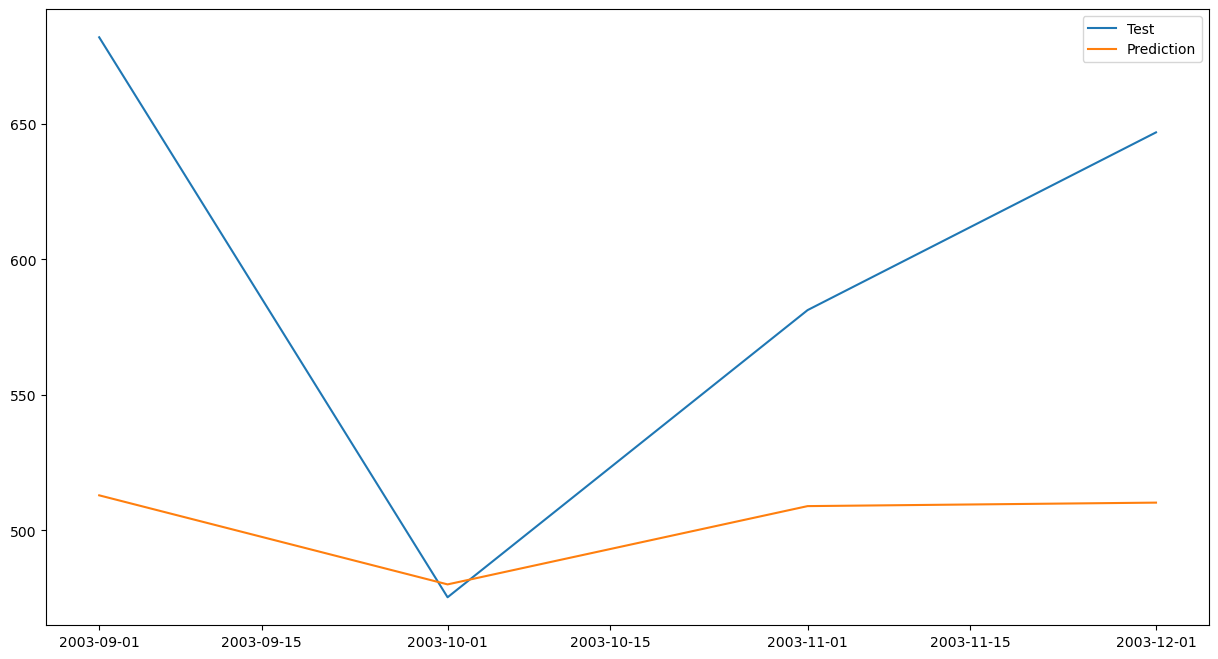

In [55]:
plt.figure(figsize = (15, 8))
plt.plot(y_test, label = "Test")
plt.plot(y_pred, label = "Prediction")
plt.legend()
plt.show()

In [57]:
# SARIMA

model = auto_arima(y_train, 
                  trace = True,
                  error_action = "ignore", 
                  suppress_warnings = True, 
                   seasonal = True,
                   m = 24
                 )

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\pmdarima\arima\utils.py:117: UserWarning: Appropriate D value may not have been reached; length of seasonally-differenced array (8) is shorter than m (24). Using D=1
  warnings.warn("Appropriate D value may not have been reached; "


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[24] intercept   : AIC=inf, Time=3.51 sec
 ARIMA(0,0,0)(0,1,0)[24] intercept   : AIC=98.457, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[24] intercept   : AIC=99.471, Time=1.10 sec
 ARIMA(0,0,1)(0,1,1)[24] intercept   : AIC=inf, Time=0.95 sec
 ARIMA(0,0,0)(0,1,0)[24]             : AIC=112.803, Time=0.03 sec
 ARIMA(0,0,0)(1,1,0)[24] intercept   : AIC=100.457, Time=0.23 sec
 ARIMA(0,0,0)(0,1,1)[24] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(0,0,0)(1,1,1)[24] intercept   : AIC=inf, Time=1.07 sec
 ARIMA(1,0,0)(0,1,0)[24] intercept   : AIC=97.468, Time=0.12 sec
 ARIMA(1,0,0)(0,1,1)[24] intercept   : AIC=99.462, Time=1.71 sec
 ARIMA(1,0,0)(1,1,1)[24] intercept   : AIC=101.476, Time=1.06 sec
 ARIMA(2,0,0)(0,1,0)[24] intercept   : AIC=98.799, Time=0.28 sec
 ARIMA(1,0,1)(0,1,0)[24] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,0,1)(0,1,0)[24] intercept   : AIC=98.648, Time=0.28 sec
 ARIMA(2,0,1)(0,1,0)[24] intercept   : AIC=100.774, Time=0.

In [59]:
y_pred = model.predict(n_periods = len(y_test))
root_mean_squared_error(y_test, y_pred)

170.93178207019412

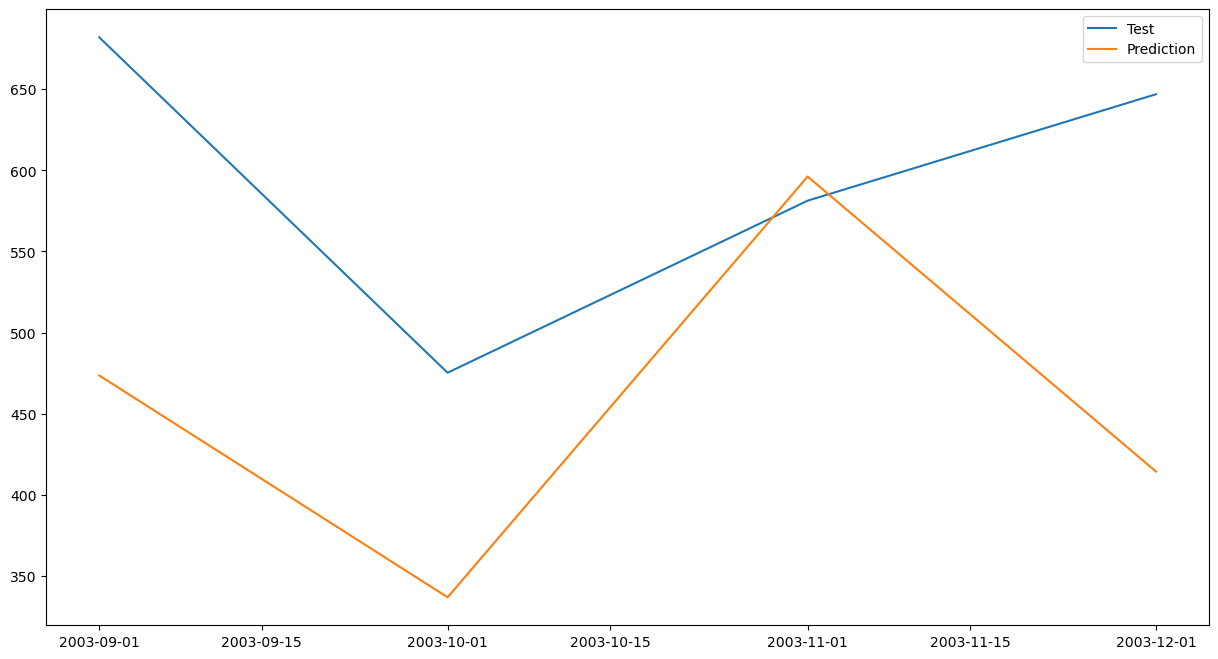

In [61]:
plt.figure(figsize = (15, 8))
plt.plot(y_test, label = "Test")
plt.plot(y_pred, label = "Prediction")
plt.legend()
plt.show()

72.65


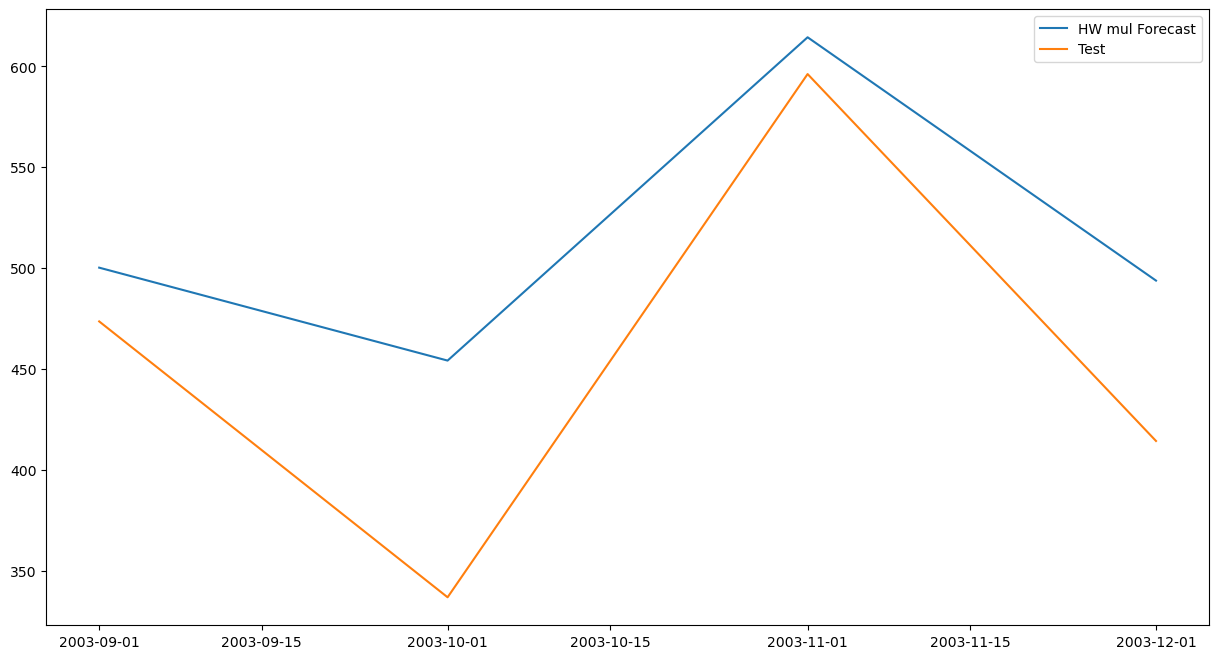

In [172]:
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import root_mean_squared_error
from statsmodels.tsa.api import Holt
# Multiplictive Damped Trend

alpha, beta, gamma = 0.09, 1, 0.1

hw_a = ExponentialSmoothing(
    y_train,
    seasonal_periods= 12,
    trend = "mul",
    seasonal= "add",
    damped_trend = True
)

fit = hw_a.fit(
    smoothing_level = alpha, 
    smoothing_trend = beta,
    smoothing_seasonal = gamma,
)

fcast = fit.forecast(len(y_pred))

holt_fcast = pd.Series(fcast, 
                       index = y_pred.index)

error = round(root_mean_squared_error(y_pred, holt_fcast), 2)
print(error)
plt.figure(figsize = (15, 8))
plt.plot(holt_fcast, label = "HW mul Forecast")
plt.plot(y_pred, label = "Test")
# plt.plot(y_train, label = "Train")
plt.legend(loc = "best")
plt.show()

##### 

### WGEM Dataset

In [277]:
data = pd.read_csv("WGEM-IND_CPTOTNSXN.csv", index_col = 0)
data.index = pd.to_datetime(data.index, format = "mixed").to_period('Y').to_timestamp()
data

,Value
Date,
1987-01-01,19.448655
1988-01-01,21.274000
1989-01-01,21.967677
1990-01-01,23.939126
1991-01-01,27.259261
1992-01-01,30.471893
1993-01-01,32.411083
1994-01-01,35.720636
1995-01-01,39.372939


<Axes: xlabel='Date'>

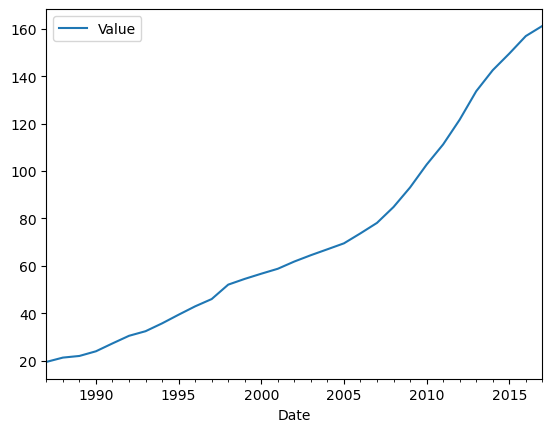

In [279]:
data.plot()

In [281]:
y = data["Value"]
y_train, y_test = y[:-4], y[-4:]
y_train.shape, y_test.shape

((27,), (4,))

In [283]:
y_test.isna().sum()

0

4.97


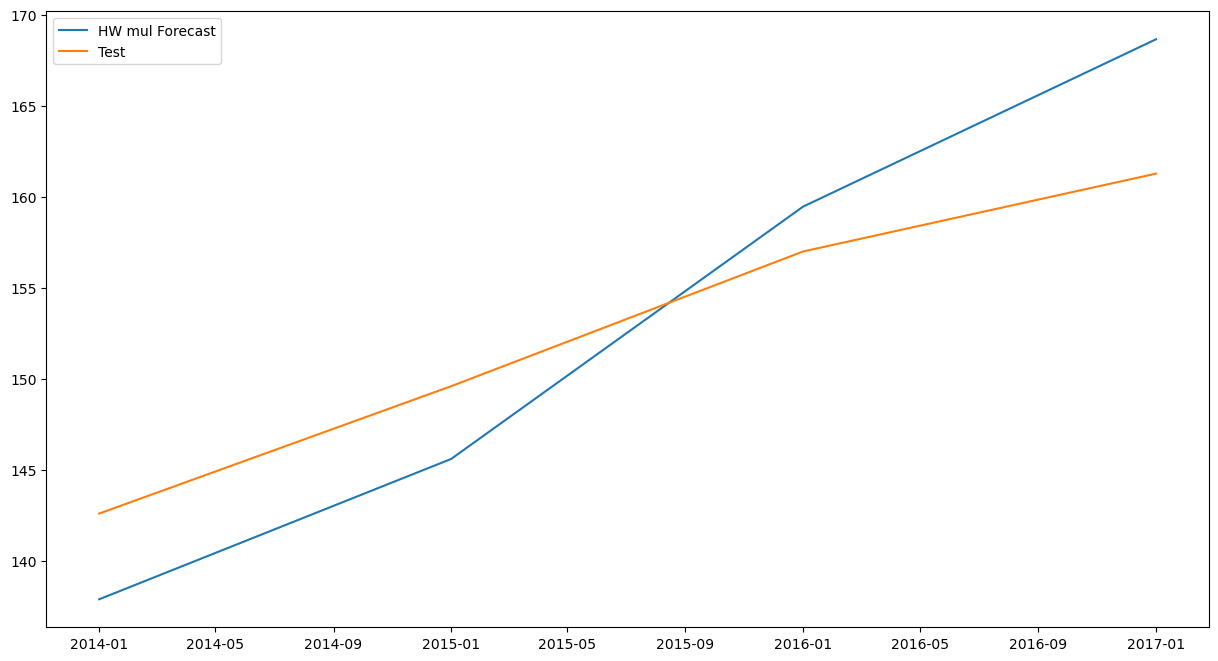

In [285]:
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import root_mean_squared_error
from statsmodels.tsa.api import Holt
# Multiplictive Damped Trend

alpha, beta, gamma = 0.09,0.93, 0.57

hw_a = ExponentialSmoothing(
    y_train,
    seasonal_periods= 2,
    trend = "mul",
    seasonal= "add",
    damped_trend = True
)

fit = hw_a.fit(
    smoothing_level = alpha, 
    smoothing_trend = beta,
    smoothing_seasonal = gamma,
)

fcast = fit.forecast(len(y_test))

holt_fcast = pd.Series(fcast, 
                       index = y_test.index)

error = round(root_mean_squared_error(y_test, holt_fcast), 2)
print(error)
plt.figure(figsize = (15, 8))
plt.plot(holt_fcast, label = "HW mul Forecast")
plt.plot(y_test, label = "Test")
# plt.plot(y_train, label = "Train")
plt.legend(loc = "best")
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.37 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=91.240, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=92.766, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=92.810, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.23 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=91.165, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=91.712, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=91.639, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=93.617, Time=0.05 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0] intercept
Total fit time: 0.780 seconds
15.240717754968145


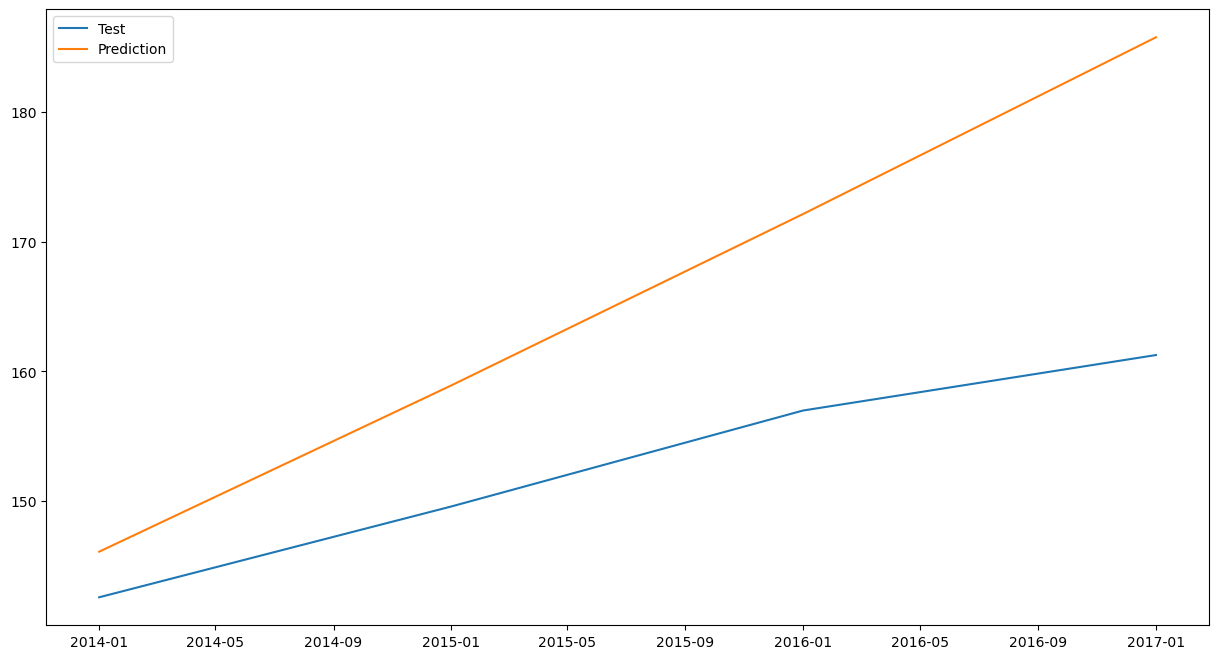

In [287]:
model = auto_arima(y_train, 
                  trace = True,
                  error_action = "ignore", 
                  suppress_warnings = True,
                 )

y_pred = model.predict(n_periods = len(y_test))
print(root_mean_squared_error(y_test, y_pred))

plt.figure(figsize = (15, 8))
plt.plot(y_test, label = "Test")
plt.plot(y_pred, label = "Prediction")
plt.legend()
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[12]             : AIC=inf, Time=1.28 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=91.240, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=93.209, Time=0.12 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=92.839, Time=0.15 sec
 ARIMA(0,2,0)(1,0,0)[12]             : AIC=91.252, Time=0.08 sec
 ARIMA(0,2,0)(0,0,1)[12]             : AIC=90.845, Time=0.13 sec
 ARIMA(0,2,0)(1,0,1)[12]             : AIC=inf, Time=0.72 sec
 ARIMA(0,2,0)(0,0,2)[12]             : AIC=inf, Time=0.62 sec
 ARIMA(0,2,0)(1,0,2)[12]             : AIC=inf, Time=0.83 sec
 ARIMA(1,2,0)(0,0,1)[12]             : AIC=92.839, Time=0.17 sec
 ARIMA(1,2,1)(0,0,1)[12]             : AIC=inf, Time=0.88 sec
 ARIMA(0,2,0)(0,0,1)[12] intercept   : AIC=91.382, Time=0.22 sec

Best model:  ARIMA(0,2,0)(0,0,1)[12]          
Total fit time: 5.237 seconds
12.346334442793342


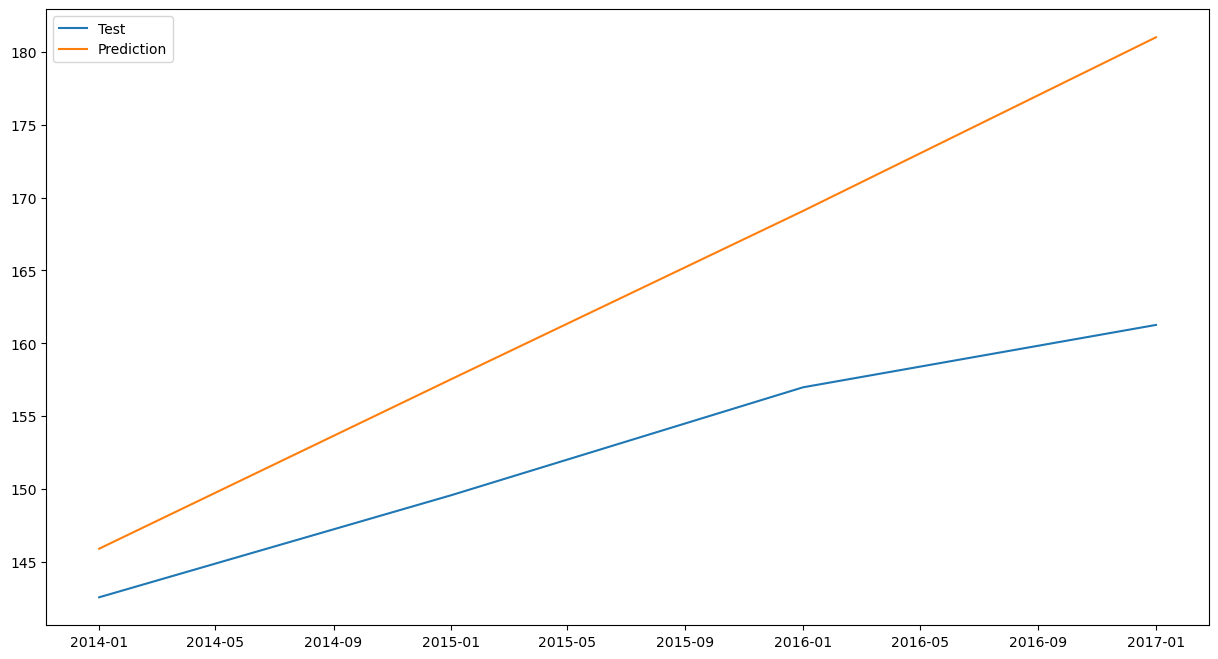

In [291]:
model = auto_arima(y_train, 
                  trace = True,
                  error_action = "ignore", 
                  suppress_warnings = True, 
                   seasonal = True,
                   m = 12
                 )

y_pred = model.predict(n_periods = len(y_test))
print(root_mean_squared_error(y_test, y_pred))

plt.figure(figsize = (15, 8))
plt.plot(y_test, label = "Test")
plt.plot(y_pred, label = "Prediction")
plt.legend()
plt.show()


### Predicting for next 3 years

In [294]:
holt = Holt(y)
fit1 = holt.fit()
fcast1 = fit1.forecast(3)
fcast1

2018-01-01    166.180982
2019-01-01    170.880303
2020-01-01    175.579624
Freq: YS-JAN, dtype: float64

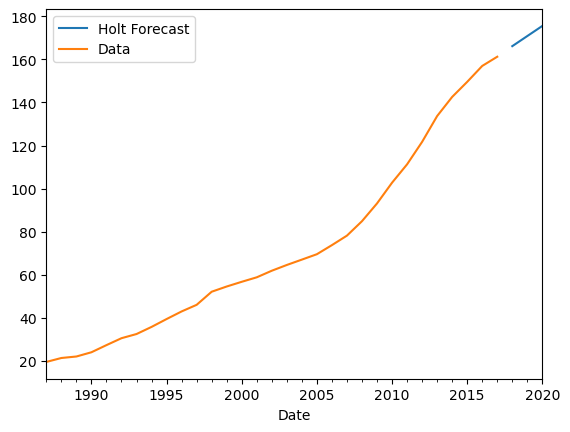

In [304]:
y = data["Value"]
fcast1.plot(label = 'Holt Forecast')
y.plot(label = 'Data')
plt.legend(loc = 'best')
plt.show()

# Boxcox Transform

In [306]:
from scipy.special import boxcox, inv_boxcox

In [320]:
bnk = pd.read_csv("BUNDESBANK-BBK01_WT5511.csv", index_col = 0)
bnk.index = pd.to_datetime(bnk.index, format = "mixed").to_period('M').to_timestamp()
bnk

,Value
Date,
1968-04-01,39.10
1968-05-01,42.00
1968-06-01,40.95
1968-07-01,38.90
1968-08-01,39.85
...,...
2015-12-01,1062.25
2016-01-01,1112.90
2016-02-01,1234.15


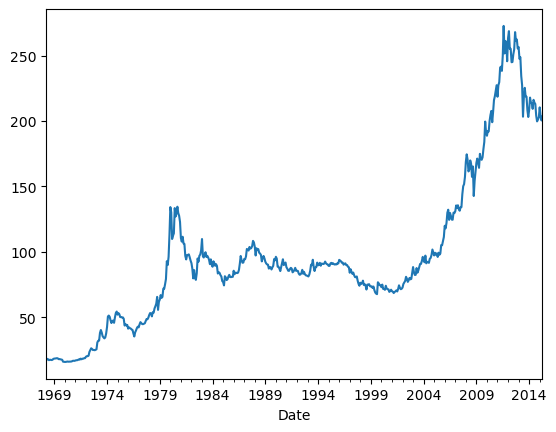

In [410]:
lamb = 0.7
y = bnk["Value"]
y_train = y[:-12]
y_test = y[-12:]
y_trans_trn = boxcox(y_train, lamb)
y_trans_trn.plot()
plt.show()

In [412]:
model = auto_arima(y_trans_trn, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3333.355, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3330.015, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3329.196, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3328.885, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3330.893, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3330.203, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3329.692, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3331.559, Time=0.38 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3330.256, Time=0.06 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 1.660 seconds


In [414]:
y_pred = model.predict(n_periods = len(y_test))
root_mean_squared_error(y_test, inv_boxcox(y_pred, lamb))

94.74230089245357

### Aus Gas Dataset

In [418]:
df = pd.read_csv("AusGas.csv", index_col = 0)
df.index = pd.to_datetime(df.index, format='mixed').to_period('M').to_timestamp() 
df

,GasProd
Month,
1956-01-01,1709
1956-02-01,1646
1956-03-01,1794
1956-04-01,1878
1956-05-01,2173
...,...
1995-04-01,49013
1995-05-01,56624
1995-06-01,61739


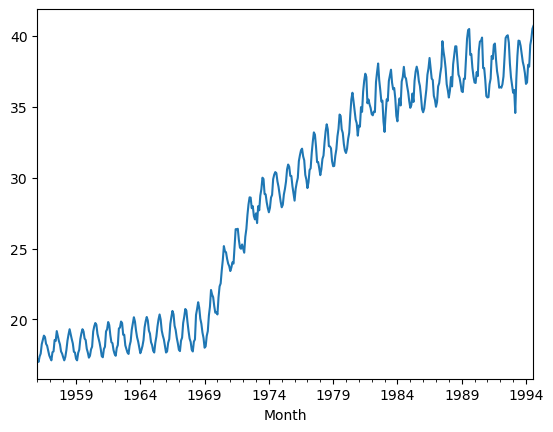

In [514]:
lamb = 0.2
y = df["GasProd"]
y_train = y[:-12]
y_test = y[-12:]
y_trans_trn = boxcox(y_train, lamb)
y_trans_trn.plot()
plt.show()

In [488]:
model = auto_arima(y_trans_trn, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7372.288, Time=1.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7651.258, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7608.762, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7622.471, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7650.519, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7591.699, Time=0.54 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7595.742, Time=0.17 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.38 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=7297.488, Time=1.40 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=7587.853, Time=1.08 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.58 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=1.69 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=7588.957, Time=1.27 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=7407.818, Time=1.80 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=7284.4

In [490]:
y_pred = model.predict(n_periods = len(y_test))
root_mean_squared_error(y_test, inv_boxcox(y_pred, lamb))

2436.5373486322123

52591.38


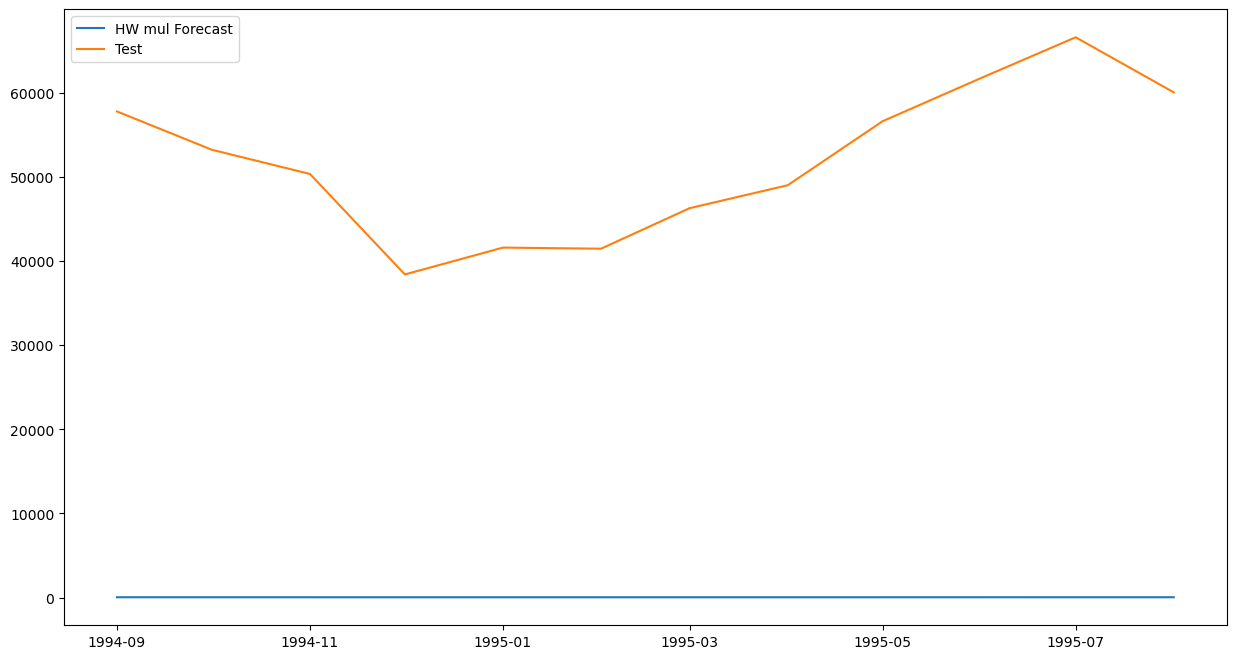

In [526]:


alpha, beta, gamma = 0.3, 0.1, 1

hw_a = ExponentialSmoothing(
    y_trans_trn,
    seasonal_periods= 12,
    trend = "mul",
    seasonal= "add",
    damped_trend = True
)

fit = hw_a.fit(
    smoothing_level = alpha, 
    smoothing_trend = beta,
    smoothing_seasonal = gamma,
)

fcast = fit.forecast(len(y_test))

holt_fcast = pd.Series(fcast, 
                       index = y_pred.index)

error = round(root_mean_squared_error(y_test, holt_fcast), 2)
print(error)
plt.figure(figsize = (15, 8))
plt.plot(holt_fcast, label = "HW mul Forecast")
plt.plot(y_test, label = "Test")
# plt.plot(y_train, label = "Train")
plt.legend(loc = "best")
plt.show()